In [108]:
import pandas as pd # 데이터 분석 목적
import matplotlib.pyplot as plt # 데이터 시각화 목적(산점도 그래프)

In [109]:
plt.rc('font',family="Malgun Gothic") # 데이터 시각화 글씨체 지정
plt.rc('axes',unicode_minus=False) # 데이터 시각화 한글 깨짐 방지

In [110]:
datacase=pd.read_csv("data/LinearRegressionData.csv")
datacase.head()

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22


In [111]:
# 독립변수(X:1개 이상인 경우여서 대문자로 표현) → 종속변수
X=datacase.iloc[:,:-1].values # 독립변수 모든 행에 -1열(점수) 전까지 출력
y=datacase.iloc[:,-1].values #종속변수 모든 행에 -1열(점수)만 출력
X.shape # Values경우 대괄호 안에 대괄호로 2차항변(Shape 시 20행 1열)
y.shape #Values 경우 (20, ) 출력 1차항변임

(20,)

In [112]:
from sklearn.linear_model import LinearRegression # 머신러닝 활용 패키지

In [113]:
reg=LinearRegression() # 머신러닝 모델을 생성함

reg.fit(X, y) # 학습을 시작(독립변수와 종속변수를 넣음)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [114]:
#단순선형회귀모델, 점수를 예측함

y_pred=reg.predict(X) # X(시간)에 대한 예측을 하는 것을 변수 y_pred에 넣음
X, y_pred, y

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 array([  5.00336377,  12.31395163,  18.58016979,  24.84638795,
         26.93512734,  33.20134551,  40.51193337,  45.73378184,
         46.77815153,  52.        ,  55.13310908,  60.35495755,
         62.44369694,  63.48806663,  64.53243633,  71.84302419,
         74.97613327,  87.5085696 ,  89.59730899, 104.2184847 ]),
 array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100]))

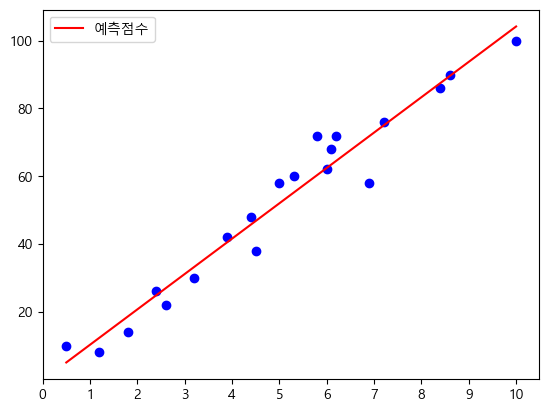

In [ ]:
plt.scatter(X, y, color="blue") #실제 점수 X y에 대한 산점도 그래프
plt.plot(X, y_pred, color='red', label='예측점수') # 최소제곱곤으로 예측한 직선(머신러닝 활용을 통한 예측)
xtick=[x for x in range(11)] # 실제값에 반영하여(시간마다) X축 단위 설정
plt.xticks(xtick) # X축 단위 적용
plt.legend()
plt.show()

In [116]:
pred=reg.predict([[9], [7],[4]]) #만약 9,7,4 시간을 공부했을 때 약 93,72,41 예측이됨
pred

#모델을 생성하여 // 데이터 값을 넣고 // 적용한다.

array([93.77478776, 72.88739388, 41.55630306])

In [117]:
m=reg.coef_ # 예측 점수의 기울기 확인
m
b=reg.intercept_
y=m*9+b
m, b, y

(array([10.44369694]), np.float64(-0.218484702867201), array([93.77478776]))

In [118]:
#단순선형회귀모델 함수화
#선형회기모델을 생성해주는 모델 생성
def model_liner(): # 변수 선언
    import pandas as pd #데이터 분석
    from sklearn.linear_model import LinearRegression # 학습데이터 모델링 분석

    dataset=pd.read_csv("data/LinearRegressionData.csv")
    X=dataset.iloc[:,:-1].values 
    y=dataset.iloc[:,-1].values # X,y 값 가져올 때 values값만 가지고 옴

    reg=LinearRegression() #모델 틀을 생성
    reg.fit(X, y) #독립변수/ 종속변수로 학습을 시작
    return reg

In [119]:
model=model_liner() #선형회귀모델 생성(함수 만든 후)
model.predict([[9]])
#출력 array([93.77478776]) X(공부시간) 9시간 투입 시 약 93.7점 예측(y)

array([93.77478776])

In [120]:
#모델 생성
def predict(hour):
    model=model_liner()
    pred=model.predict([[hour]])
    print(f'{hour}시간 공부했을때 예상 점수 : {pred[0]:.2f}')
    
predict(9)

9시간 공부했을때 예상 점수 : 93.77


In [121]:
from sklearn.model_selection import train_test_split #과적합 문제 해결 (더 랜덤하게 하기)
X=datacase.iloc[:, :-1].values
y=datacase.iloc[:,-1].values
X.shape, y.shape

((20, 1), (20,))

In [122]:
from sklearn.model_selection import train_test_split #과적합 문제 해결 (더 랜덤하게 하기)
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
X_train

array([[5.3],
       [8.4],
       [3.9],
       [6.1],
       [2.6],
       [1.8],
       [3.2],
       [6.2],
       [5. ],
       [4.4],
       [7.2],
       [5.8],
       [2.4],
       [0.5],
       [6.9],
       [6. ]])

In [123]:
X_train

array([[5.3],
       [8.4],
       [3.9],
       [6.1],
       [2.6],
       [1.8],
       [3.2],
       [6.2],
       [5. ],
       [4.4],
       [7.2],
       [5.8],
       [2.4],
       [0.5],
       [6.9],
       [6. ]])

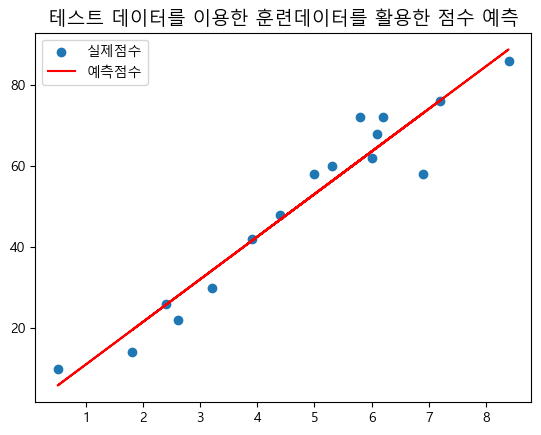

In [ ]:
#전체 데이터를 테스트 데이터/훈련 데이터를 통해 예측하여 점수를 예측함
reg=LinearRegression()
reg.fit(X_train, y_train)

plt.scatter(X_train,y_train, label='실제점수')
plt.plot(X_train, reg.predict(X_train), label='예측점수',color='r')
plt.legend()
plt.title('테스트 데이터를 이용한 훈련데이터를 활용한 점수 예측', size=13.5)
plt.show()

In [ ]:
#학습 데이터 검증하기(최소제곱법을 이용한 단순선형회기)
reg=LinearRegression()
reg.fit(X,y)
reg.score(X, y)
reg.fit(X_train, y_train)
reg.score(X_train, y_train)  #훈련 데이터로 점수 예측

reg=LinearRegression()
reg.fit(X_test, y_test)
reg.score(X_test,y_test) #테스트 데이터로 점수를 예측

0.9939502903988819